# Phishing URL Detection 

The Internet has become an indispensable part of
our life, However, It also has provided opportunities to anonymously perform malicious activities like Phishing. Phishers try to deceive their victims by social engineering or creating mockup websites to steal information such as account ID, username, password from individuals and organizations. Although many methods have been proposed to detect phishing websites, Phishers have evolved their methods to escape from these detection methods. One of the most successful methods for detecting these malicious activities is Machine Learning. This is because most Phishing attacks have some common characteristics which can be identified by machine learning methods.

The steps demonstrated in this notebook are:

1. Loading the data
2. Familiarizing with data & EDA
3. Visualizing the data
4. Splitting the data
5. Training the data
6. Conclusion

In [17]:
!pip install numpy==1.26.4


[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
# 1. Import required libraries
!pip install numpy pandas matplotlib seaborn scikit-learn joblib

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
import warnings
import joblib
warnings.filterwarnings('ignore')


[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


## 1. Loading Data:

The dataset is borrowed from Kaggle, https://www.kaggle.com/eswarchandt/phishing-website-detector .

A collection of website URLs for 11000+ websites. Each sample has 30 website parameters and a class label identifying it as a phishing website or not (1 or -1).


The overview of this dataset is, it has 11054 samples with 32 features. Download the dataset from the link provided.

In [19]:
# 2. Load data
data = pd.read_csv("phishing.csv")
data.head()

,Index,UsingIP,LongURL,ShortURL,Symbol@,Redirecting//,PrefixSuffix-,SubDomains,HTTPS,DomainRegLen,...,UsingPopupWindow,IframeRedirection,AgeofDomain,DNSRecording,WebsiteTraffic,PageRank,GoogleIndex,LinksPointingToPage,StatsReport,class
0,0,1,1,1,1,1,-1,0,1,-1,...,1,1,-1,-1,0,-1,1,1,1,-1
1,1,1,0,1,1,1,-1,-1,-1,-1,...,1,1,1,-1,1,-1,1,0,-1,-1
2,2,1,0,1,1,1,-1,-1,-1,1,...,1,1,-1,-1,1,-1,1,-1,1,-1
3,3,1,0,-1,1,1,-1,1,1,-1,...,-1,1,-1,-1,0,-1,1,1,1,1
4,4,-1,0,-1,1,-1,-1,1,1,-1,...,1,1,1,1,1,-1,1,-1,-1,1


## 2. Familiarizing with Data & EDA:
In this step, few dataframe methods are used to look into the data and its features.

In [20]:
# 3. Data shape
data.shape

(11054, 32)

In [21]:
# 4. Data info
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054 entries, 0 to 11053
Data columns (total 32 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Index                11054 non-null  int64
 1   UsingIP              11054 non-null  int64
 2   LongURL              11054 non-null  int64
 3   ShortURL             11054 non-null  int64
 4   Symbol@              11054 non-null  int64
 5   Redirecting//        11054 non-null  int64
 6   PrefixSuffix-        11054 non-null  int64
 7   SubDomains           11054 non-null  int64
 8   HTTPS                11054 non-null  int64
 9   DomainRegLen         11054 non-null  int64
 10  Favicon              11054 non-null  int64
 11  NonStdPort           11054 non-null  int64
 12  HTTPSDomainURL       11054 non-null  int64
 13  RequestURL           11054 non-null  int64
 14  AnchorURL            11054 non-null  int64
 15  LinksInScriptTags    11054 non-null  int64
 16  ServerFormHandler    1

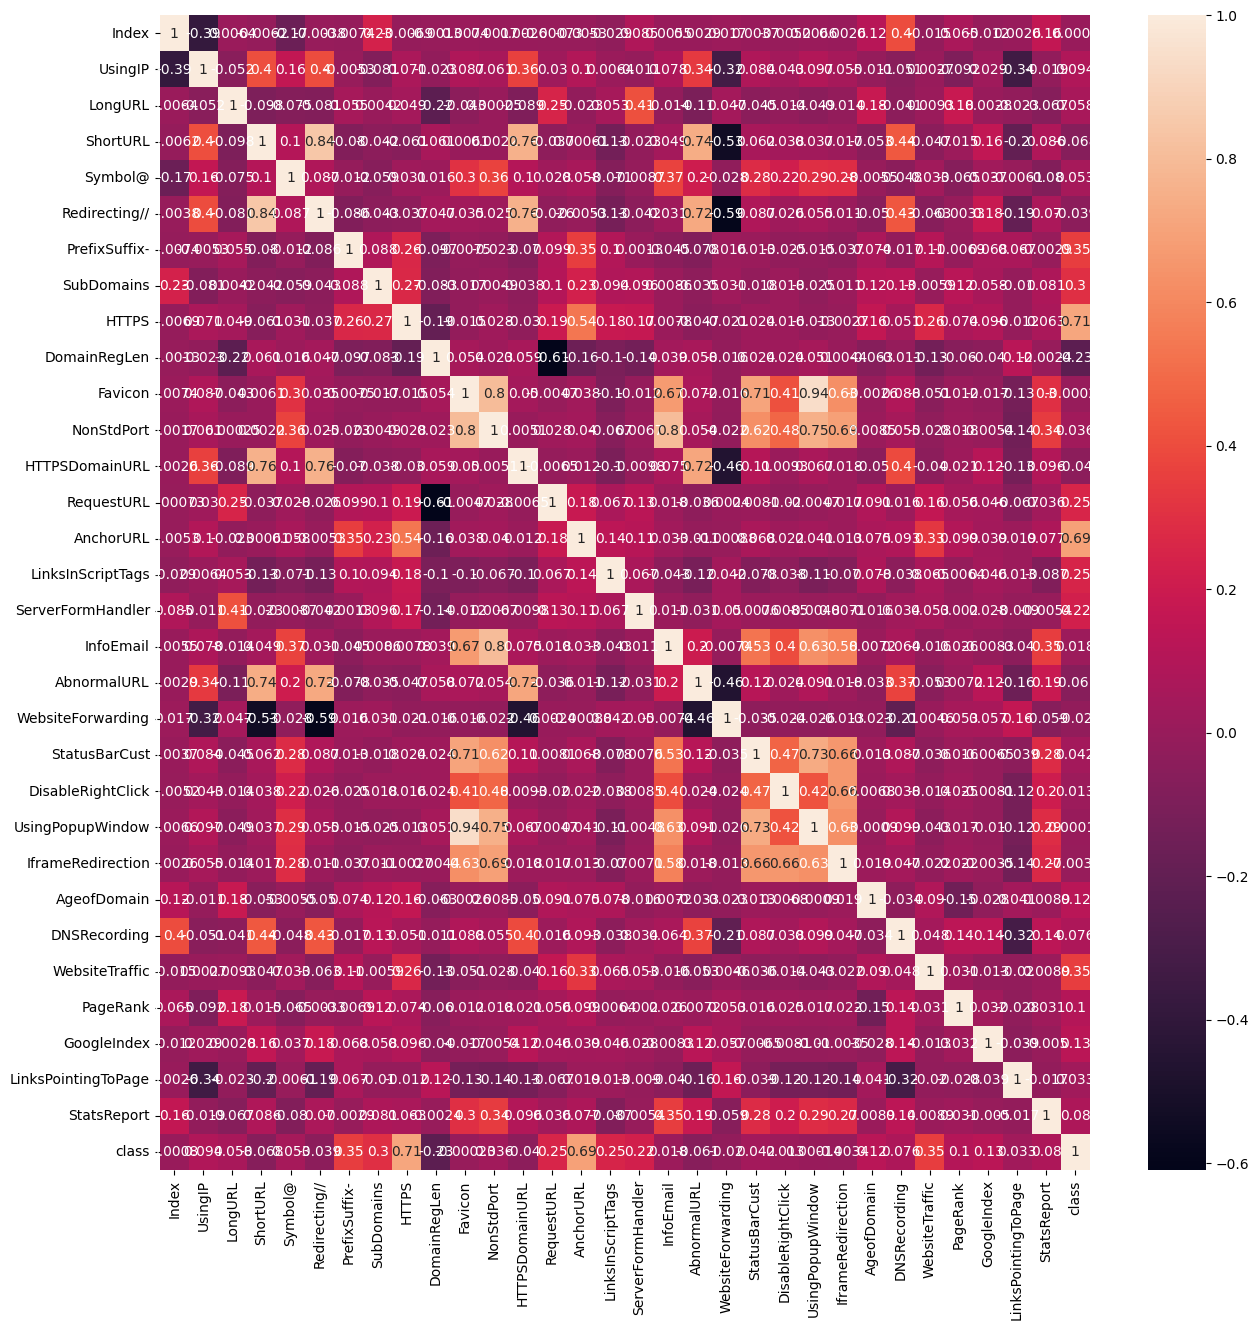

In [22]:
# 5. Correlation heatmap
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), annot=True)
plt.show()

In [23]:
# 6. Features and Target
x = data.drop(['class'], axis=1)
y = data['class']


In [24]:
# 7. Train-test split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [26]:
# 8. Train Gradient Boosting Classifier


print("Training GradientBoostingClassifier...")
gbc = GradientBoostingClassifier()
gbc.fit(x_train, y_train)
print("Training complete.")



Training GradientBoostingClassifier...
Training complete.


In [27]:
# 9. Test set accuracy
y_pred = gbc.predict(x_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.4f}")

Test set accuracy: 0.9539


In [28]:
!pip install joblib
import joblib
import os

# Give the full path to Downloads folder
downloads_path = os.path.expanduser('~/Downloads/model.pkl')

# Save the model
joblib.dump(gbc, downloads_path)



[notice] A new release of pip is available: 23.2.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


['C:\\Users\\yaksh/Downloads/model.pkl']

In [ ]:
import pickle

# Save the trained model
with open('pickle/model.pkl', 'wb') as f:
    pickle.dump(gbc, f)